### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [317]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [347]:
#We read the coupon.csv file and uploaded to a Data frame. 
coupon_data = pd.read_csv('coupons.csv')
#We rename the'Y' column by 'Accepted_coupon'
coupon_data.rename(columns={'Y': 'Accepted_coupon'}, inplace=True)
coupon_data.shape

#The Data frame contains 12,684 rows and 26 columns.

(12684, 26)

In [348]:
coupon_data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accepted_coupon
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [349]:
#Step 1: Detect duplicates
duplicates = coupon_data.duplicated()
print("Data Frame duplicates: " + str(len(coupon_data[duplicates])))
#since we do not have a primary key for each row, we will assume that each record represents a different driver. Therefore, we will not eliminate identical rows. No changes are needed.

Data Frame duplicates: 74


In [350]:
#Step 2: Resolve Structural Errors
print("Data Frame Coupon structure" )
print(coupon_data.dtypes)

# We inspected the data structure of the Data frame, and we observed a couple of numeric fields registered as String (object) fields. For instance, age and income fields. 
# We will not convert the string fields to numerica because they contain data ranges that will help us in our data analysis later. 

Data Frame Coupon structure
destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Accepted_coupon          int64
dtype: object


In [351]:
#Step 3: Filter Outliers
car = coupon_data['car'].unique() 
# We have a few drivers that “do not drive”. We will exclude them from the data frame because they are not drivers and therefore valid records. 
print("Car field - Unique values: "+str(car))

car_do_not_drive=coupon_data.query('car == "do not drive" ')
length_car_do_not_drive = len(car_do_not_drive)
print ("Number of drivers that do not drive: " + str(length_car_do_not_drive))

#We exclude 22 rows with car value equal to "do not drive"
coupon_data=coupon_data.query('car != "do not drive" ')
length_after2 = len(coupon_data)

print ("Number of drivers after removing the ones that do not drive: "  + str(length_after2))

Car field - Unique values: [nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']
Number of drivers that do not drive: 22
Number of drivers after removing the ones that do not drive: 12662


In [352]:
#Step 4: Validate

#Based on inspection, I observed that car column has “Car that is too old to install Onstar :D” value. 
#We will maintain these rows and replace this car value with “Model Y”. 
#Afterall, we do not focus on car models, but the coupon usage. We replaced 21 rows.

#Number of drivers with an old car
car_old_data = coupon_data.query('car == "Car that is too old to install Onstar :D"')
length_car_old_data = len(car_old_data)
print ("Number of drivers with an old car: " + str(length_car_old_data))

# Lastly, we will maintain these rows and replace this car value with “Model Y”. 
coupon_data.loc[coupon_data['car'] == "Car that is too old to install Onstar :D", "car" ] = 'Model Y'
#coupon_data['car'].unique()

Number of drivers with an old car: 21


In [353]:
#New clean data frame
coupon_data_cleaned=coupon_data
length_coupon_data_cleaned = len(coupon_data_cleaned)
print ("Number of drivers after cleansing: " + str(length_coupon_data_cleaned))
coupon_data_cleaned.reset_index(inplace=True)

Number of drivers after cleansing: 12662


3. Decide what to do about your missing data -- drop, replace, other...

In [354]:
#Data cleansing
#To detect any empty values, we searched for all the unique values for each data frame column
#and printed the values for inspection. 

destination = coupon_data_cleaned['destination'].unique() #The values are reasonable
passanger = coupon_data_cleaned['passanger'].unique() #The values are reasonable
weather = coupon_data_cleaned['weather'].unique() #The values are reasonable
temperature = coupon_data_cleaned['temperature'].unique() #The values are reasonable
time = coupon_data_cleaned['time'].unique() #The values are reasonable
coupon = coupon_data_cleaned['coupon'].unique() #The values are reasonable
expiration = coupon_data_cleaned['expiration'].unique() #The values are reasonable
gender = coupon_data_cleaned['gender'].unique() #The values are reasonable
age = coupon_data_cleaned['age'].unique() #The values are reasonable
maritalStatus = coupon_data_cleaned['maritalStatus'].unique() #The values are reasonable
has_children = coupon_data_cleaned['has_children'].unique() #The values are reasonable
education = coupon_data_cleaned['education'].unique() #The values are reasonable
occupation = coupon_data_cleaned['occupation'].unique() #The values are reasonable
income = coupon_data_cleaned['income'].unique() #The values are reasonable
car = coupon_data_cleaned['car'].unique() #We have nan values. 
Bar = coupon_data_cleaned['Bar'].unique() #We have nan values.
CoffeeHouse = coupon_data_cleaned['CoffeeHouse'].unique() #We have nan values.
CarryAway = coupon_data_cleaned['CarryAway'].unique() #We have nan values.
RestaurantLessThan20 = coupon_data_cleaned['RestaurantLessThan20'].unique() #We have nan values.
Restaurant20To50 = coupon_data_cleaned['Restaurant20To50'].unique() #We have nan values.
toCoupon_GEQ5min = coupon_data_cleaned['toCoupon_GEQ5min'].unique() #We have pure 1 values ... this column is worthless.
toCoupon_GEQ15min = coupon_data_cleaned['toCoupon_GEQ15min'].unique() #The values are reasonable
toCoupon_GEQ25min = coupon_data_cleaned['toCoupon_GEQ25min'].unique() #The values are reasonable
direction_same = coupon_data_cleaned['direction_same'].unique() #The values are reasonable
direction_opp = coupon_data_cleaned['direction_opp'].unique() #The values are reasonable
Accepted_coupon = coupon_data_cleaned['Accepted_coupon'].unique() #The values are reasonable

print("Car unique values: "+str(car))
print("Bar unique values: " + str(Bar))
print("Coffee house unique values: " + str(CoffeeHouse))
print("Carry Away unique values" + str(CarryAway))
print("Restaurantlessthan 20 unique values"+ str(RestaurantLessThan20))
print("Restaurant From 20 To 50 unique values"+ str(Restaurant20To50))


Car unique values: [nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'Model Y']
Bar unique values: ['never' 'less1' '1~3' 'gt8' nan '4~8']
Coffee house unique values: ['never' 'less1' '4~8' '1~3' 'gt8' nan]
Carry Away unique values[nan '4~8' '1~3' 'gt8' 'less1' 'never']
Restaurantlessthan 20 unique values['4~8' '1~3' 'less1' 'gt8' nan 'never']
Restaurant From 20 To 50 unique values['1~3' 'less1' 'never' 'gt8' '4~8' nan]


Number of empty values in car column: 12576


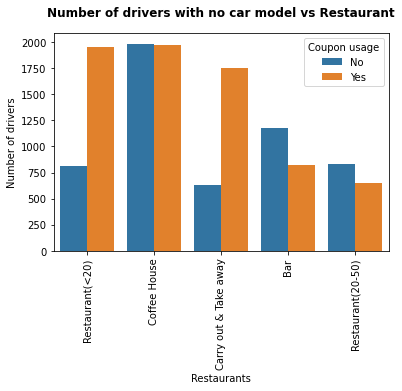

In [355]:
# For car field, we expect to capture the car model data. However, we need to understand
# the meaning of the empty value. It could mean that we have no car for this driver, and
# he did not receive a coupon. Hence, to set some context, we prepared a “countplot” chart
# to identify whether drivers with empty car field used the coupon and went to a Restaurant, Bar, etc. 

coupon_data_cleaned_carna=coupon_data_cleaned[coupon_data_cleaned['car'].isnull()]
lenght_coupon_data_cleaned_carna = len(coupon_data_cleaned_carna)

g=sns.countplot(x='coupon', hue = 'Accepted_coupon' , data=coupon_data_cleaned_carna)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.legend(labels=["No","Yes"], title = "Coupon usage")
plt.xlabel("Restaurants")
plt.ylabel("Number of drivers")
plt.title("Number of drivers with no car model vs Restaurant", fontweight='bold', y=1.05)
print("Number of empty values in car column: " + str(lenght_coupon_data_cleaned_carna))


In [356]:
# From chart inspection, we observed that some of the drivers used the discount coupon. 
# Therefore, they have a car, but the data does not show the car model. We will fill out
# the empty spaces with “Model X” value. So they can be considered in the analysis. 
# We replaced 12,576 rows

coupon_data_cleaned.loc[coupon_data_cleaned['car'].isnull(), "car" ] = 'Model X'
length_after1 = len(coupon_data_cleaned)

print("Number of driver after car model replacement: " + str(length_after1) )


Number of driver after car model replacement: 12662


In [357]:
#For all the restaurant fields with empty values, we will drop all the rows that did not go to any of the restaurants
#(bars, coffee, etc.). There is no value in analyzing discount coupons if we do not know the consumer profile. 
#After removing those rows, we retain 12,057 drivers.

columns_with_na = coupon_data_cleaned.columns[coupon_data_cleaned.isna().any()].tolist()
print("Columns with empty values in Data Frame: " + str(columns_with_na))

coupon_data_cleaned_nona=coupon_data_cleaned.dropna()
lenght_coupon_data_cleaned_nona=len(coupon_data_cleaned_nona)
print("Number of drivers with no empty values: " + str(lenght_coupon_data_cleaned_nona))


Columns with empty values in Data Frame: ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
Number of drivers with no empty values: 12057


4. What proportion of the total observations chose to accept the coupon?



Drivers who accepted the coupons: 6867
Total of observations: 12057
Percentage of drivers who accepted the coupon: 57.0%


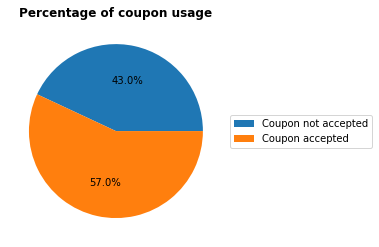

In [358]:
# We filtered the data frame by the drivers who accepted the coupons, and then
# we compared it with the total number of observations. We found that 57% of the drivers
# accepted the coupons. Also, we prepared a pie chart to facilitate the inspection.

# Calculations for drivers who accepted the coupons
Accept_coupon= len(coupon_data_cleaned_nona.query('Accepted_coupon == 1'))
Percentage = round((Accept_coupon / lenght_coupon_data_cleaned_nona)*100,0)


# Create the pie chart
y = coupon_data_cleaned_nona.groupby(['Accepted_coupon']).count()
fig, ax = plt.subplots()
labels = ["Coupon not accepted", "Coupon accepted"]
wedges, texts, autotexts = ax.pie(y['coupon'], labels=None, autopct='%1.1f%%')
ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Percentage of coupon usage', fontweight='bold')

print("Drivers who accepted the coupons: " + str(Accept_coupon))
print("Total of observations: " + str(lenght_coupon_data_cleaned_nona))
print("Percentage of drivers who accepted the coupon: " + str(Percentage)+ "%")

# As we can see, the percentage of drivers who accept the coupon is superior to the percentage
# of drivers who reject the coupons. This suggests that distributing discount coupons is a good strategy
# to foster the consumption of food in restaurants.

5. Use a bar plot to visualize the `coupon` column.

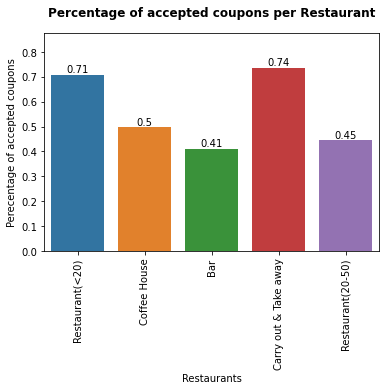

In [359]:
# We prepared a bar plot for all the coupons, and we compared it against the coupon usage by restaurant. 

g=sns.barplot(x='coupon', y='Accepted_coupon',ci=None, data=coupon_data_cleaned_nona)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

#plt.legend(labels=["No","Yes"], title = "Coupon accepted")
plt.xlabel("Restaurants")
plt.ylabel("Perecentage of accepted coupons")
plt.title("Percentage of accepted coupons per Restaurant", fontweight='bold', y=1.05)
plt.ylim(0, max(plt.ylim()) + 0.1)

for p in g.patches:
    g.annotate(f'{round(p.get_height(),2)}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    
# Per plot inspection, we observed that only the inexpensive restaurants and carry out restaurants have a high acceptance of the coupons
# above 50%. However, all the other restaurants have moderate acceptance of coupons above 40%. 

# At a glance, coupons is an effective strategy to foster food consumption in restaurants. No matter what type of restaurant you select,
# in all the cases they have acceptance superior to 40% of the cases.

6. Use a histogram to visualize the temperature column.

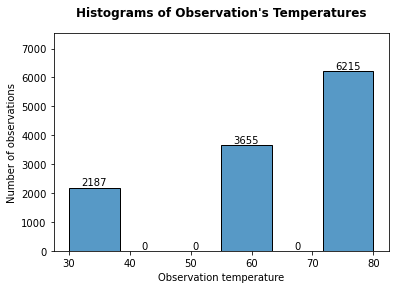

In [360]:
#We prepared a histogram to visualize the temperature distribution. 

ax = sns.histplot(data=coupon_data_cleaned_nona, x="temperature",bins=6)
plt.xlabel("Observation temperature")
plt.ylabel("Number of observations")
plt.title("Histograms of Observation's Temperatures", fontweight='bold', y=1.05)
plt.ylim(0, max(plt.ylim()) + 1000) 

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Per histogram inspection, we observed that high temperatures are very common in the data frame. 

Text(0.5, 1.0, 'Percentage of day temperatures')

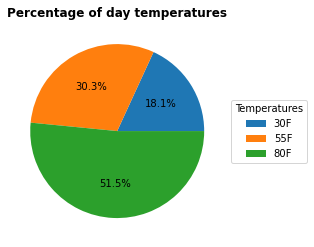

In [361]:
# Also, we built a countplot and pie chart of the temperatures to have a better idea of 
# the percentage distribution of temperature observations in the data frame, and, also, 
# the coupon acceptance per temperature observation. 

y = coupon_data_cleaned_nona.groupby(['temperature']).count()

# Create the pie chart
fig, ax = plt.subplots()
y.dtypes
labels = ["30F", "55F","80F"]
wedges, texts, autotexts = ax.pie(y['destination'], labels=None, autopct='%1.1f%%')
ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0.5), title = "Temperatures")
ax.set_title('Percentage of day temperatures', fontweight='bold')

# From the pie chart below, 80F is the most common temperature (more than 51% of observations), 
# followed by the 55F temperature (30% of observations), and lastly 30F temperature (18% of observations). 


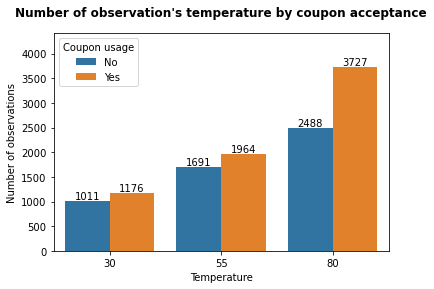

In [362]:
#Prepare the count plot

ax=sns.countplot(x='temperature', hue = 'Accepted_coupon' , data=coupon_data_cleaned_nona)

plt.xlabel("Temperature")
plt.ylabel("Number of observations")
plt.legend(labels=["No","Yes"], title = "Coupon usage")
plt.title("Number of observation's temperature by coupon acceptance", fontweight='bold', y=1.05)
plt.ylim(0, max(plt.ylim()) + 500) 


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# From the count chart below, the data suggests that coupons are accepted for any observation disregarding the temperature.
# Further, it suggests that coupon acceptance increases with temperature, going from 1176 on 30F observations
# (53% of acceptance) to 3727 on 80F observations (60% of acceptance). 
# On 80F observations, coupons are more accepted than any other temperature observation.

# In conclusion, 80F observations are more common in the data frame as they represent 51% of the observations, 
# and coupon acceptance increases up to 60% on these observations. 

1**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [363]:
#We will use the data frame cleaned before, and we will add the BAR filters(coupon filter sedt to BAR, and BAR filter different to never) 

bar_data = coupon_data_cleaned_nona.query('Bar != "never" and coupon == "Bar" ')
len_bar_data = len(bar_data)
bar_data.shape



(1123, 27)

2. What proportion of bar coupons were accepted?


Accept_coupon: 637
Total of drivers: 1123
Percentage of drivers accepting the bar coupon: 56.72%


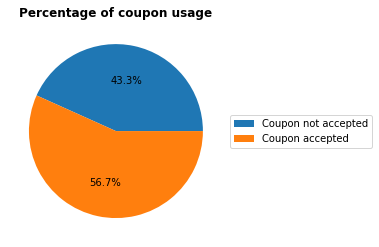

In [364]:
# We count the total number of rows, and the total number of coupons that were accepted. 
# After that, we conducted a simple division and obtained the percentage of drivers using a discount coupon (56.72%).
# Further, we prepared a pie chart for visualizations purposes, and we observed the same.

Accept_coupon1= len(bar_data.query('Accepted_coupon == 1'))
Percentage = (Accept_coupon1 / len_bar_data)*100

y = bar_data.groupby(['Accepted_coupon']).count()

fig, ax = plt.subplots()
labels = ["Coupon not accepted", "Coupon accepted"]
wedges, texts, autotexts = ax.pie(y['coupon'], labels=None, autopct='%1.1f%%')
ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Percentage of coupon usage', fontweight='bold')

print("Accept_coupon: " + str(Accept_coupon1))
print("Total of drivers: " + str(len_bar_data))
print("Percentage of drivers accepting the bar coupon: " + str(round(Percentage,2))+ "%")



3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


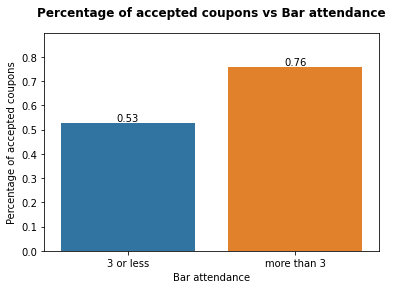

In [365]:
# We created a new column called “Bar_less3” where we populated the column with ‘less3’ value if the “Bar” column
# had “less1” or "1~3", and ‘gt3’ value if the “Bar” column had “4~8” or "gt8". Once we classified all the drivers
# by “Bar_less3” column, we prepared a barplot showing the two groups (‘3 or less, and ‘more than 4’) vs
# the “Accepted coupons”. 

bar_datanotna.loc[bar_datanotna['Bar'] == "less1", 'Bar_less3'] = '3 or less'
bar_datanotna.loc[bar_datanotna['Bar'] == "1~3", 'Bar_less3'] = '3 or less'
bar_datanotna.loc[bar_datanotna['Bar'] == "4~8", 'Bar_less3'] = 'more than 3'
bar_datanotna.loc[bar_datanotna['Bar'] == "gt8", 'Bar_less3'] = 'more than 3'

g=sns.barplot(x='Bar_less3', y='Accepted_coupon', ci=None, data=bar_datanotna)

plt.xlabel("Bar attendance")
plt.ylabel("Percentage of accepted coupons")
plt.title("Percentage of accepted coupons vs Bar attendance", fontweight='bold', y=1.05)
plt.ylim(0, max(plt.ylim()) + 0.1)

for p in g.patches:
    g.annotate(f'{round(p.get_height(),2)}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    
# From the bar plot below, drivers who go to the bar 3 or fewer times have 53% of coupon acceptance, 
# and drivers who go more than 3 times have 76% of coupon acceptance. Therefore, the more people go to a bar,
# the more likely they use the coupon discount.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


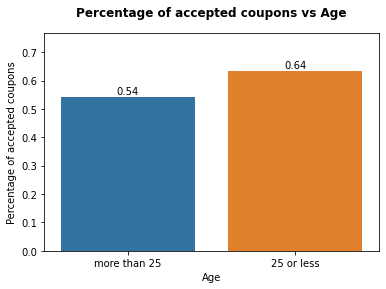

In [366]:
# Similarly, we created a new column called “Age_less25” where we populated the column with ’25 or less’ value 
# if the “age” column had “below21” or "21", and ‘more_than_25’ value if the “age” column had “26”, “31”, “36”, “41” or "46".
# Once we classified all the drivers by “Age_less25” column, we prepared a barplot showing 
# the two groups (‘less_than_25’, and ‘more_than_25’) vs the “Accepted coupons” column. 

bar_datanotna.loc[bar_datanotna['age']  == "below21" , 'Age_less25'] = "25 or less"
bar_datanotna.loc[bar_datanotna['age']  == "21" , 'Age_less25'] = "25 or less"
bar_datanotna.loc[bar_datanotna['age']  == "26" , 'Age_less25'] = "more than 25"
bar_datanotna.loc[bar_datanotna['age']  == "31" , 'Age_less25'] = "more than 25"
bar_datanotna.loc[bar_datanotna['age']  == "36" , 'Age_less25'] = "more than 25"
bar_datanotna.loc[bar_datanotna['age']  == "41" , 'Age_less25'] = "more than 25"
bar_datanotna.loc[bar_datanotna['age']  == "46" , 'Age_less25'] = "more than 25"
bar_datanotna.loc[bar_datanotna['age']  == "50plus" , 'Age_less25'] = "more than 25"

g=sns.barplot(x='Age_less25', y='Accepted_coupon', ci=None, data=bar_datanotna)

plt.xlabel("Age")
plt.ylabel("Percentage of accepted coupons")
plt.title("Percentage of accepted coupons vs Age", fontweight='bold', y=1.05)
plt.ylim(0, max(plt.ylim()) + 0.1)

for p in g.patches:
    g.annotate(f'{round(p.get_height(),2)}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    
# From the bar plot below, drivers who are 25 years old or younger have 64% of coupon acceptance, and 
# drivers who are more than 25 years old have 54% of coupon acceptance. Therefore, the older the driver, 
# the more likely he/she uses the coupon discount.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


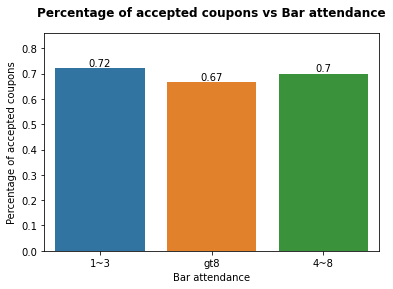

In [367]:
# We applied filters to the data frame to the columns “Bar”, “Passanger”, and “occupation”. 
# After that, we prepared a barplot showing Bar frequency groups (‘1~3’, ‘4~8’, and ‘gt8’) vs 
# the “Accepted coupons” column. 


bar_datanotna_morethan1 = bar_datanotna.query('Bar != "less1" and passanger in ["Friend(s)","Partner"] and occupation != "Farming Fishing & Forestry"')
g=sns.barplot(x='Bar', y='Accepted_coupon', ci=None, data=bar_datanotna_morethan1)
#print(len(bar_datanotna_morethan1))

plt.xlabel("Bar attendance")
plt.ylabel("Percentage of accepted coupons")
plt.title("Percentage of accepted coupons vs Bar attendance", fontweight='bold', y=1.05)
plt.ylim(0, max(plt.ylim()) + 0.1)

for p in g.patches:
    g.annotate(f'{round(p.get_height(),2)}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# From the chart below, all the drivers over who go more than 1 time to the bar with passengers that 
# were not a kid and had occupations other than farming, fishing, or forestry 
# have similar high acceptance rate (between 67% and 72%) to use the coupon. 

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Accept_coupon after filter: 134
Row counts for filtered dataset: 188
Percentage of people accepting the coupon: 71.28%


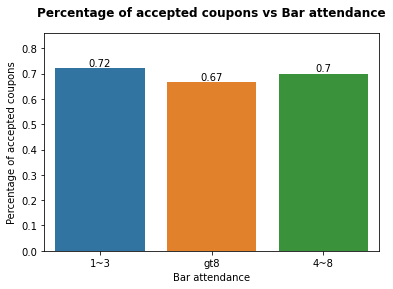

In [368]:
# We applied filters to the data frame to the columns “Bar”, “Passanger”, and “maritalStatus”. 

bar_datanotna_morethan1_passenger_widowed = bar_datanotna.query('Bar != "less1" and passanger in ["Friend(s)","Partner"] and maritalStatus != "Widowed"')
length_bar1 =len(bar_datanotna_morethan1_passenger_widowed)

# After that, we count the total number of rows, and the total number of coupons that were accepted 
# on the filtered data frame. 
Accept_coupon1= len(bar_datanotna_morethan1_passenger_widowed.query('Accepted_coupon == 1'))

# Lastly, we conducted a simple division and obtain the percentage of drivers within the filtered
# dataset using a discount coupon (71.28%). 
Percentage1 = (Accept_coupon1 / length_bar1)*100

print("Accept_coupon after filter: " + str(Accept_coupon1))
print("Row counts for filtered dataset: " + str(length_bar1))
print("Percentage of people accepting the coupon: " + str(round(Percentage1,2))+ "%")

# We, also, prepared a chart where we inspected the acceptance rate by bar attendance (between 67% and 72%),
# and it shows a similar acceptance of coupons for each age group.
g=sns.barplot(x='Bar', y='Accepted_coupon', ci=None, data=bar_datanotna_morethan1_passenger_widowed)
plt.xlabel("Bar attendance")
plt.ylabel("Percentage of accepted coupons")
plt.title("Percentage of accepted coupons vs Bar attendance", fontweight='bold', y=1.05)
plt.ylim(0, max(plt.ylim()) + 0.1)

for p in g.patches:
    g.annotate(f'{round(p.get_height(),2)}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')


Accept_coupon after filter2: 234
Row counts for filtered dataset: 326
Percentage of people accepting the coupon: 71.78%


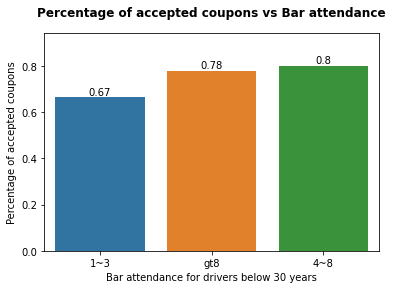

In [369]:
# We applied filters to the data frame to the columns “Bar” and “age”. 

bar_datanotna_morethan1_under30 = bar_datanotna.query('Bar != "less1" and age in ["below21","21","26"]')
length_bar2 = len(bar_datanotna_morethan1_under30) 

# After that, we count the total number of rows, and the total number of coupons that were accepted 
# on the filtered data frame. 
Accept_coupon2= len(bar_datanotna_morethan1_under30.query('Accepted_coupon == 1'))

# Lastly, we conducted a simple division and obtain the percentage of drivers within the filtered 
# dataset using a discount coupon (71.78%). 
Percentage2 = (Accept_coupon2 / length_bar2)*100

print("Accept_coupon after filter2: " + str(Accept_coupon2))
print("Row counts for filtered dataset: " + str(length_bar2))
print("Percentage of people accepting the coupon: " + str(round(Percentage2,2))+ "%")

# We, also, prepared a chart where we inspected the acceptance rate by bar attendance for drivers below 30 years,
# and it shows that people that go more than 4 times to bar per month are more likely to use the coupons 
# (nearly 80% of acceptance).

g=sns.barplot(x='Bar', y='Accepted_coupon', ci=None, data=bar_datanotna_morethan1_under30)

plt.xlabel("Bar attendance for drivers below 30 years")
plt.ylabel("Percentage of accepted coupons")
plt.title("Percentage of accepted coupons vs Bar attendance", fontweight='bold', y=1.05)
plt.ylim(0, max(plt.ylim()) + 0.1)

for p in g.patches:
    g.annotate(f'{round(p.get_height(),2)}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')


Accept_coupon: 82
Row counts for filtered dataset: 151
Percentage of people accepting the coupon: 54.3%


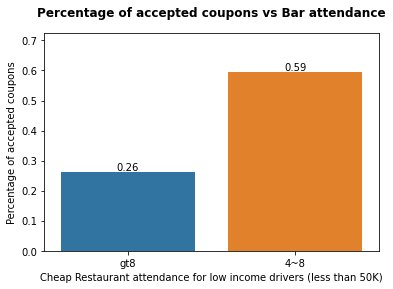

In [370]:
#We applied filters to the data frame to the columns “coupon”, “RestaurantLessThan20” and “income”.

bar_datanotna_morethan4cheaprest_incomeless50 = bar_datanotna.query('RestaurantLessThan20 in ["4~8", "gt8"] and income in ["$50000 - $62499","$62500 - $74999","$75000 - $87499","$87500 - $99999"]')
length_bar3 = len(bar_datanotna_morethan4cheaprest_incomeless50)

# After that, we count the total number of rows, and the total number of coupons that were accepted on the filtered data frame.
Accept_coupon3= len(bar_datanotna_morethan4cheaprest_incomeless50.query('Accepted_coupon == 1'))

# Lastly, we conducted a simple division and obtain the percentage of drivers within the filtered dataset 
# using a discount coupon (54.3%).
Percentage3 = (Accept_coupon3 / length_bar3)*100

print("Accept_coupon: " + str(Accept_coupon3))
print("Row counts for filtered dataset: " + str(length_bar3))
print("Percentage of people accepting the coupon: " + str(round(Percentage3,2))+ "%")

# We, also, prepared a chart where we inspected the acceptance rate for bar tickets by cheap restaurant attendance 
# for drivers who attend to cheap restaurants more than 4 times with an income less than 50K, and it shows that
# low income people that go to cheap restaurants are more likely to use the coupons (nearly 80% of acceptance). 
# Conversely, drivers who go more than 8 times to cheap restaurants will not accept the bar discount coupon 
# (26% of acceptance).

g=sns.barplot(x='RestaurantLessThan20', y='Accepted_coupon', ci=None, data=bar_datanotna_morethan4cheaprest_incomeless50)

plt.xlabel("Cheap Restaurant attendance for low income drivers (less than 50K)")
plt.ylabel("Percentage of accepted coupons")
plt.title("Percentage of accepted coupons vs Bar attendance", fontweight='bold', y=1.05)
plt.ylim(0, max(plt.ylim()) + 0.1)

for p in g.patches:
    g.annotate(f'{round(p.get_height(),2)}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [371]:
print("Based on prior charts, they are young people (less than 30 years) that go to the bar more than 1 time per month. They usually go when they are driving with friends or partners(no kids). In terms of their economy, they earn less than 50K and they go to eat to cheap restaurants between 4 and 8 times per month. ")

Based on prior charts, they are young people (less than 30 years) that go to the bar more than 1 time per month. They usually go when they are driving with friends or partners(no kids). In terms of their economy, they earn less than 50K and they go to eat to cheap restaurants between 4 and 8 times per month. 


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [372]:
# 1. Create a new Data Frame that contains just the Expensive restaurant coupons.

# We will use the data frame cleaned before, and we will add the BAR filters(coupon filter sedt to BAR, and BAR filter different to never) 

Expensive_Restaurant_Data = coupon_data_cleaned_nona.query('Restaurant20To50 != "never" and coupon == "Restaurant(20-50)" ')
Lenght_Expensive_Restaurant_Data = len(Expensive_Restaurant_Data) 
Expensive_Restaurant_Data.shape
#print(Lenght_Expensive_Restaurant_Data)


(1192, 27)

Accepted coupon: 563
Total of drivers (Exp Rest): 1192
Percentage of drivers accepting the bar coupon: 47.23%


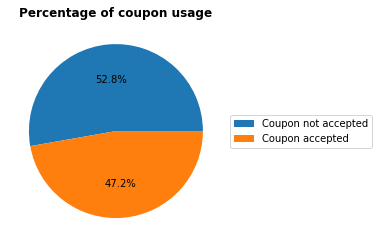

In [373]:
#2.	What proportion of expensive restaurant coupons were accepted?

# We count the total number of rows, and the total number of coupons that were accepted. 
Accept_coupon1= len(Expensive_Restaurant_Data.query('Accepted_coupon == 1'))

# After that, we conducted a simple division and obtained the percentage of drivers using a discount coupon (47.23%). 
# Further, we prepared a pie chart for visualizations purposes, and we observed the same.
Percentage = (Accept_coupon1 / Lenght_Expensive_Restaurant_Data)*100

y = Expensive_Restaurant_Data.groupby(['Accepted_coupon']).count()


fig, ax = plt.subplots()
labels = ["Coupon not accepted", "Coupon accepted"]
wedges, texts, autotexts = ax.pie(y['coupon'], labels=None, autopct='%1.1f%%')
ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Percentage of coupon usage', fontweight='bold')

print("Accepted coupon: " + str(Accept_coupon1))
print("Total of drivers (Exp Rest): " + str(Lenght_Expensive_Restaurant_Data))
print("Percentage of drivers accepting the bar coupon: " + str(round(Percentage,2))+ "%")


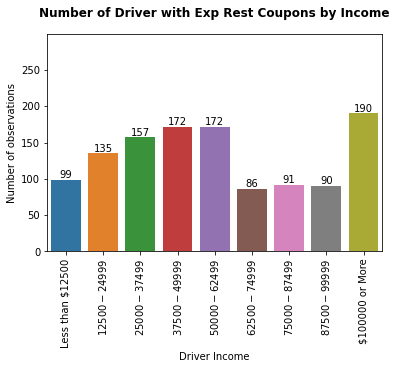

In [374]:
#3. What is the income distribution of the drivers with expensive restaurant coupons?
# First, we will classify the drivers with Exp Restaurant coupons by income and prepare a count plot

desired_order = ['Less than $12500', '$12500 - $24999', '$25000 - $37499','$37500 - $49999','$50000 - $62499','$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More']
#g=sns.countplot(x='income', hue='Accepted_coupon', data=Expensive_Restaurant_Data, order = desired_order)
g=sns.countplot(x='income', data=Expensive_Restaurant_Data, order = desired_order)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

#plt.legend(labels=["No","Yes"], title = "Coupon accepted")
plt.xlabel("Driver Income")
plt.ylabel("Number of observations")
plt.title("Number of Driver with Exp Rest Coupons by Income", fontweight='bold', y=1.05)
plt.ylim(0, max(plt.ylim()) + 100)

#plt.legend(labels=["No","Yes"], title = "Coupon usage")


for p in g.patches:
    g.annotate(f'{round(p.get_height(),2)}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# From inspection of the count plot, we observe that the biggest number of observations comes from the drivers who earn more than 100K per year.

In [375]:
# 4. What is the education level of the drivers earning more than 100K with expensive restaurant coupons?

# We will inspect the 190 drivers with Exp Rest coupons earning more than 100K per year,

Expensive_Restaurant_Data_morethan100K= Expensive_Restaurant_Data.query('income == "$100000 or More"')
Length_Expensive_Restaurant_Data_morethan100K = len(Expensive_Restaurant_Data_morethan100K)
print(Length_Expensive_Restaurant_Data_morethan100K)

190


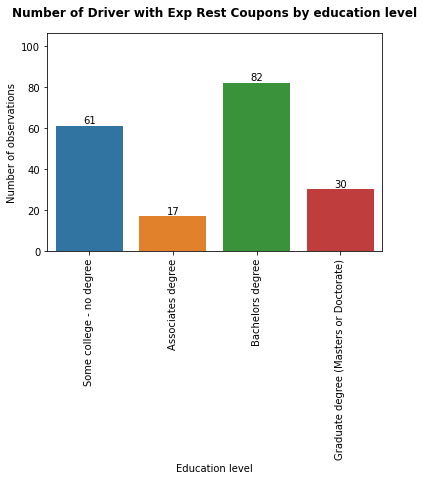

In [376]:
# and we will classify them by education degree. 

desired_order = ["Some college - no degree","Associates degree","Bachelors degree","Graduate degree (Masters or Doctorate)"]

# We prepared a count plot, 
g=sns.countplot(x='education', data=Expensive_Restaurant_Data_morethan100K, order = desired_order)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
#plt.legend(labels=["No","Yes"], title = "Coupon usage")


#plt.legend(title = "Exp Rest attendance")
plt.xlabel("Education level")
plt.ylabel("Number of observations")
plt.title("Number of Driver with Exp Rest Coupons by education level", fontweight='bold', y=1.05)
plt.ylim(0, max(plt.ylim()) + 20)
#plt.legend(labels=["No","Yes"], title = "Coupon usage")

for p in g.patches:
    g.annotate(f'{round(p.get_height(),2)}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

#  and observed 82 drivers with Bachelor degree, which represents 43.15%. Therefore, we will inspect the Bachelor group

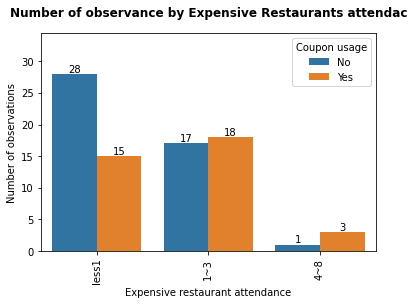

In [377]:
# 5. What is the expensive restaurant attendance and coupon usage for drivers earning more than 100K with Bachelor’s degree
# and expensive restaurant coupons?

# We will inspect the 82 drivers with Bachelor education and Exp Rest coupons earning more than 100K per year,
# and we will classify them by attendance. 

Expensive_Restaurant_Data_morethan100K_Bachelor= Expensive_Restaurant_Data_morethan100K.query('education == "Bachelors degree"')

# We prepared a count plot by attendance and coupon acceptance, 
desired_order = ["less1","1~3","4~8"]
g=sns.countplot(x='Restaurant20To50', hue ="Accepted_coupon" , data=Expensive_Restaurant_Data_morethan100K_Bachelor, order = desired_order)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

#plt.legend(title = "Exp Rest attendance")
plt.xlabel("Expensive restaurant attendance")
plt.ylabel("Number of observations")
plt.title("Number of observance by Expensive Restaurants attendac", fontweight='bold', y=1.05)
plt.ylim(0, max(plt.ylim()) + 5)
plt.legend(labels=["No","Yes"], title = "Coupon usage")

for p in g.patches:
    g.annotate(f'{round(p.get_height(),2)}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
#and observed that as the frequency of attendance increases (less1, 1~3,4~8), the attendance values decrease (43, 35, 4). Further, the more monthly visits per group increase (43, 35, 4), the coupon acceptance numbers increase (15, 18, 3) as well. It is important to note that coupons will be more likely to be accepted for any driver that goes more than 1 time per month (18>17 and 3>1) to expensive restaurants.


In [378]:
#6. Based on these observations, what do you hypothesize about drivers who accepted the expensive restaurant coupons?

print('In conclusion, expensive restaurant coupons will be more likely accepted by drivers earning more than 100k with a bachelor’s degree when they go more than 1 time per month to an expensive restaurant.')

In conclusion, expensive restaurant coupons will be more likely accepted by drivers earning more than 100k with a bachelor’s degree when they go more than 1 time per month to an expensive restaurant.
